# **Hechos y víctimas de suicidios en la República Argentina**

**Integrantes Grupo 5:**

*   Marcia Millan
*   Daiana Zarallo
*   Gabriela Velasquez
*   Silvana Fernandez
*   Sol Zito

## **Presentación del tema**




El suicidio es un evento mediante el cual una persona, presumiblemente de manera deliberada, se quita la vida.

La investigación tendrá como objeto brindar información sobre los hechos consumados registrados por las fuerzas policiales, fuerzas federales de seguridad y otras entidades oficiales de recepción de denuncias, en todo el ámbito del territotio de la República Argentina, con el objetivo de determinar las características de los hechos, así como de las personas involucradas, tanto víctimas como testigos.

## **Dataset**

### **Origen del dataset**

La fuente del dataset se podrá consultar a través del siguiente enlance:

https://www.datos.gob.ar/dataset/seguridad-suicidios-sistema-alerta-temprana-estadisticas-criminales-republica-argentina/archivo/seguridad_8.2

### **Descripción del Dataset**

Los principales datos que recaba son: fecha, hora y lugar del hecho, tipo de lugar, modalidad utilizada, motivo que origina el registro, edad, sexo. Cada uno de estas variables se encuentra asociada al código del departamento y localidad donde ocurrió el hecho.


## **Objetivos del Proyecto**

* ¿Cual fue la modalidad mas utilizada para cometer suicidios entre el año 2022 y 2023?
* ¿En que provincia se registraron mas suicidios entre el año 2022 y 2023?
* ¿ Cual fue el mes en el que se registraron mas suicidios?


## **Análisis y exploración del Dataset**

### **Importación de librerías**

In [55]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Leemos los archivos**

In [4]:
#Leemos el data set
url = '/content/drive/MyDrive/tercera_preentrega/SAT-SS-BU_2017-2022.csv'
df=pd.read_csv(url)#(url)
df

,id_hecho,federal,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,...,tipo_lugar_ampliado,tipo_lugar_otro,modalidad,modalidad_ampliado,modalidad_otro,motivo_origen_registro,motivo_origen_registro_otro,suicida_sexo,suicida_tr_edad,suicida_identidad_genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,...,Domicilio particular,NaN,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,...,Hotel/Motel/Hospedaje temporario,Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,37640,No,18,Corrientes,18049,Esquina,10,Esquina,2022,7,...,Cárcel o comisaría,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,30-34,Varón
21715,37642,No,18,Corrientes,18070,Goya,20,Goya,2022,9,...,Domicilio particular,NaN,Sin determinar,Sin determinar,NaN,Intervención policial,NaN,Masculino,50-54,Varón
21716,37643,No,18,Corrientes,18070,Goya,20,Goya,2022,9,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,15-19,Varón
21717,37639,No,18,Corrientes,18133,San Cosme,30,San Cosme,2022,7,...,Campo/descampado/zona rural,Campo/descampado/zona rural,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,30-34,Varón


**Tipo de dato del dataset**

In [5]:
# Tipo de dato trabajado
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### **Análisis exploratorio**

In [6]:
print(f'El dataset tiene: \n {df.shape[0]} Filas\n {df.shape[1]} Columnas')

El dataset tiene: 
 21719 Filas
 23 Columnas


In [8]:
# Análisis basico para conocer tipos de datos, cantidad de columnas y filas, valores faltantes, variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_hecho                     21719 non-null  int64 
 1   federal                      21719 non-null  object
 2   provincia_id                 21719 non-null  int64 
 3   provincia_nombre             21719 non-null  object
 4   departamento_id              21719 non-null  int64 
 5   departamento_nombre          21719 non-null  object
 6   localidad_id                 21719 non-null  object
 7   localidad_nombre             21719 non-null  object
 8   anio                         21719 non-null  int64 
 9   mes                          21719 non-null  int64 
 10  fecha_hecho                  21719 non-null  object
 11  hora_hecho                   21719 non-null  object
 12  tipo_lugar                   21719 non-null  object
 13  tipo_lugar_ampliado          21

Además de las filas y columnas, observamos que los tipos de datos que el dataset contiene son int y string. Y que también hay columnas con valores faltantes.

**Primeras 10 filas**

In [9]:
#Imprimimos las 10 primeras filas
df.head(10)

,id_hecho,federal,provincia_id,provincia_nombre,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,...,tipo_lugar_ampliado,tipo_lugar_otro,modalidad,modalidad_ampliado,modalidad_otro,motivo_origen_registro,motivo_origen_registro_otro,suicida_sexo,suicida_tr_edad,suicida_identidad_genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,...,Domicilio particular,NaN,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,...,Hotel/Motel/Hospedaje temporario,Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
5,8707,No,58,Neuquén,58035,Confluencia,40,Cutral Có,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
6,8708,No,58,Neuquén,58049,Huiliches,10,Junín de los Andes,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,45-49,Sin determinar
7,8709,No,58,Neuquén,58105,Picunches,30,Las Lajas,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,15-19,Sin determinar
8,8710,No,58,Neuquén,58014,Añelo,10,Añelo,2017,2,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,25-29,Sin determinar
9,8754,No,66,Salta,66126,Orán,70,San Ramón de la Nueva Orán (Est. Orán),2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,Sin determinar,Sin determinar


**Columnas**

In [10]:
#Lista de las columnas

df.columns

Index(['id_hecho', 'federal', 'provincia_id', 'provincia_nombre',
       'departamento_id', 'departamento_nombre', 'localidad_id',
       'localidad_nombre', 'anio', 'mes', 'fecha_hecho', 'hora_hecho',
       'tipo_lugar', 'tipo_lugar_ampliado', 'tipo_lugar_otro', 'modalidad',
       'modalidad_ampliado', 'modalidad_otro', 'motivo_origen_registro',
       'motivo_origen_registro_otro', 'suicida_sexo', 'suicida_tr_edad',
       'suicida_identidad_genero'],
      dtype='object')

**Tipos de datos de cada columna**

In [11]:
#Tipos de datos
df.dtypes

id_hecho                        int64
federal                        object
provincia_id                    int64
provincia_nombre               object
departamento_id                 int64
departamento_nombre            object
localidad_id                   object
localidad_nombre               object
anio                            int64
mes                             int64
fecha_hecho                    object
hora_hecho                     object
tipo_lugar                     object
tipo_lugar_ampliado            object
tipo_lugar_otro                object
modalidad                      object
modalidad_ampliado             object
modalidad_otro                 object
motivo_origen_registro         object
motivo_origen_registro_otro    object
suicida_sexo                   object
suicida_tr_edad                object
suicida_identidad_genero       object
dtype: object

**Renombrar columnas**

In [12]:

#Definir los nuevos nombres de las columnas

nuevos_nombres={
    "provincia_nombre":"provincia",
    "suicida_sexo":"sexo",
    "suicida_tr_edad":"rango_de_edad",
    "suicida_identidad_genero":"genero"}

#Renombrar las columnas
df=df.rename(columns=nuevos_nombres)
df



,id_hecho,federal,provincia_id,provincia,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,...,tipo_lugar_ampliado,tipo_lugar_otro,modalidad,modalidad_ampliado,modalidad_otro,motivo_origen_registro,motivo_origen_registro_otro,sexo,rango_de_edad,genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,...,Domicilio particular,NaN,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,...,Vía pública,NaN,Ahorcamiento,Ahorcamiento,NaN,Denuncia particular,NaN,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,...,Hotel/Motel/Hospedaje temporario,Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,20-24,Sin determinar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,37640,No,18,Corrientes,18049,Esquina,10,Esquina,2022,7,...,Cárcel o comisaría,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,30-34,Varón
21715,37642,No,18,Corrientes,18070,Goya,20,Goya,2022,9,...,Domicilio particular,NaN,Sin determinar,Sin determinar,NaN,Intervención policial,NaN,Masculino,50-54,Varón
21716,37643,No,18,Corrientes,18070,Goya,20,Goya,2022,9,...,Domicilio particular,NaN,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,15-19,Varón
21717,37639,No,18,Corrientes,18133,San Cosme,30,San Cosme,2022,7,...,Campo/descampado/zona rural,Campo/descampado/zona rural,Ahorcamiento,Ahorcamiento,NaN,Intervención policial,NaN,Masculino,30-34,Varón


**Lista de columnas renombradas**


In [13]:
df.columns.tolist()

['id_hecho',
 'federal',
 'provincia_id',
 'provincia',
 'departamento_id',
 'departamento_nombre',
 'localidad_id',
 'localidad_nombre',
 'anio',
 'mes',
 'fecha_hecho',
 'hora_hecho',
 'tipo_lugar',
 'tipo_lugar_ampliado',
 'tipo_lugar_otro',
 'modalidad',
 'modalidad_ampliado',
 'modalidad_otro',
 'motivo_origen_registro',
 'motivo_origen_registro_otro',
 'sexo',
 'rango_de_edad',
 'genero']

**División de grupos por columna**

In [36]:
#Vemos cuál es la división de grupos para cada una de las columnas.
print(f'Los hechos registrados son: {df.id_hecho.count()}')
print('\n')
print(f'Las provincias registradas por su ID son: ')
df_sorted = df.sort_values(by='provincia_id')
ids = set()
for index, row in df_sorted.iterrows():
  if row['provincia_id'] in ids:
    continue
  print(f'ID: {row["provincia_id"]}, Provincia: {row["provincia"]}')
  ids.add(row['provincia_id'])
print('\n')
print(f'La cantidad de hechos registrados por departamentos son:\n{df.departamento_nombre.value_counts()}')
print('\n')
print(f'Los hechos registradas por año son:\n{df.anio.value_counts()}')
print('\n')
print(f'Los hechos registrados por meses son:\n{df.mes.value_counts()}')
print('\n')
print(f'Los hechos registrados por hora  son: {df.hora_hecho.value_counts()}')
print('\n')
print(f'Los hechos registrados por lugar del hecho son:\n{df.tipo_lugar.value_counts()}')
print('\n')
print(f'Los hechos registrados por modalidad son:\n{df.modalidad.value_counts()}')
print('\n')
print(f'Los hechos registrados por motivo de origen son:\n{df.motivo_origen_registro.value_counts()}')
print('\n')
print(f'Los hechos registrados por sexo son:\n{df.sexo.value_counts()}')



Los hechos registrados son: 21719


Las provincias registradas por su ID son: 
ID: 2, Provincia: Ciudad Autónoma de Buenos Aires
ID: 6, Provincia: Buenos Aires
ID: 10, Provincia: Catamarca
ID: 14, Provincia: Córdoba
ID: 18, Provincia: Corrientes
ID: 22, Provincia: Chaco
ID: 26, Provincia: Chubut
ID: 30, Provincia: Entre Ríos
ID: 34, Provincia: Formosa
ID: 38, Provincia: Jujuy
ID: 42, Provincia: La Pampa
ID: 46, Provincia: La Rioja
ID: 50, Provincia: Mendoza
ID: 54, Provincia: Misiones
ID: 58, Provincia: Neuquén
ID: 62, Provincia: Río Negro
ID: 66, Provincia: Salta
ID: 70, Provincia: San Juan
ID: 74, Provincia: San Luis
ID: 78, Provincia: Santa Cruz
ID: 82, Provincia: Santa Fe
ID: 86, Provincia: Santiago del Estero
ID: 90, Provincia: Tucumán
ID: 94, Provincia: Tierra del Fuego, Antártida e Islas del Atlántico Sur


La cantidad de hechos registrados por departamentos son:
departamento_nombre
Capital         2109
La Matanza       743
Rosario          703
La Capital       430
San Fernando 

**Edad mínima y máxima de suicidios**

In [ ]:
#El rango mínimo de edad
rango_minimo = df["rango_de_edad"].min()
print(f'El rango mínimo de edad de suicidios consumados es entre los {rango_minimo} años')


El rango mínimo de edad de suicidios consumados es entre los 10-14 años


In [ ]:
#El rango máximo de edad
edad_filtrada = df[df['rango_de_edad'] != 'Sin determinar']
rango_maximo = edad_filtrada['rango_de_edad'].max()

print(f'El rango máximo de edad de suicidios consumados es entre los {rango_maximo} años')

El rango máximo de edad de suicidios consumados es entre los 90 y más años


**Cantidad de suicidios por provincia, año, lugar, modalidad, sexo y genero**

In [39]:
#Vemos cuantas personas se suicidaron por cada provincia, año, lugar, modalidad y sexo

pd_grupos = df.groupby(['provincia', 'anio', 'tipo_lugar', 'sexo','genero', 'modalidad']).size().reset_index(name='cantidad')
pd_grupos


,provincia,anio,tipo_lugar,sexo,genero,modalidad,cantidad
0,Buenos Aires,2017,Cárcel o comisaría,Femenino,Sin determinar,Ahorcamiento,1
1,Buenos Aires,2017,Cárcel o comisaría,Masculino,Sin determinar,Ahorcamiento,6
2,Buenos Aires,2017,Domicilio particular,Femenino,Sin determinar,Ahorcamiento,100
3,Buenos Aires,2017,Domicilio particular,Femenino,Sin determinar,Arma blanca / elemento cortante,5
4,Buenos Aires,2017,Domicilio particular,Femenino,Sin determinar,Arma de fuego,17
...,...,...,...,...,...,...,...
2539,Tucumán,2022,Otro Lugar ( Especificar ),Femenino,Mujer,Ahorcamiento,2
2540,Tucumán,2022,Otro Lugar ( Especificar ),Masculino,Varón,Ahorcamiento,6
2541,Tucumán,2022,Otro Lugar ( Especificar ),Masculino,Varón,Sumersión en piscina / mar / río,1
2542,Tucumán,2022,Vía pública,Masculino,Varón,Ahorcamiento,14


**Cantidad de suicidios por provincia y modalidad**

In [ ]:
#Vemos cuales fueron las provincias con mayor cantidad de suicidios.

pd_total_por_provincia = df.groupby('provincia')['modalidad'].value_counts().reset_index(name='cantidad')
pd_total_por_provincia = pd_total_por_provincia.sort_values(by='provincia')
pd_total_por_provincia

,provincia,modalidad,cantidad
0,Buenos Aires,Ahorcamiento,3695
1,Buenos Aires,Sin determinar,1133
2,Buenos Aires,Arma de fuego,1128
3,Buenos Aires,Se arroja a las vías de FF.CC.,238
4,Buenos Aires,Envenenamiento,129
...,...,...,...
197,Tucumán,Se arroja al vacío,8
198,Tucumán,Sin determinar,7
199,Tucumán,Se incinera,2
200,Tucumán,Otra modalidad,1


**Cantidad total de suicidios por provincia de mayor a menor casos**

In [ ]:
#Cantidad total de suicidios consumados por provincia de mayor a menor
total_casos_por_provincia = df.groupby(['provincia']).size().reset_index(name='total_casos')
total_casos_por_provincia = total_casos_por_provincia.sort_values(by='total_casos', ascending=False)
total_casos_por_provincia = total_casos_por_provincia.reset_index(drop=True)
total_casos_por_provincia

,provincia,total_casos
0,Buenos Aires,6550
1,Santa Fe,2138
2,Córdoba,1475
3,Ciudad Autónoma de Buenos Aires,1328
4,Entre Ríos,1298
5,Mendoza,1197
6,Salta,1102
7,Tucumán,783
8,Santiago del Estero,712
9,Chaco,643


**Cantidad total y promedio de suicidios por modalidad a nivel nacional de mayor a menor casos**

In [62]:
total_casos_por_modalidad = df.groupby(['modalidad']).size().reset_index(name='total_casos')
total_casos_por_modalidad['promedio_modalidad'] = total_casos_por_modalidad['total_casos'] / total_casos_por_modalidad['total_casos'].sum() * 100
total_casos_por_modalidad = total_casos_por_modalidad.sort_values(by='total_casos', ascending=False).round(2)
total_casos_por_modalidad = total_casos_por_modalidad.reset_index(drop=True)
total_casos_por_modalidad


,modalidad,total_casos,promedio_modalidad
0,Ahorcamiento,14651,67.46
1,Arma de fuego,3454,15.90
2,Sin determinar,1381,6.36
3,Se arroja al vacío,755,3.48
4,Envenenamiento,576,2.65
5,Se arroja a las vías de FF.CC.,279,1.28
6,Arma blanca / elemento cortante,265,1.22
7,Sumersión en piscina / mar / río,171,0.79
8,Se incinera,133,0.61
9,Otra modalidad,54,0.25


Podemos ver que la modalidad más utilizada para este tipo de hecho es el Ahorcamiento, representando un promedio del 67.46%.-

**Modalidad del hecho y género**

In [38]:
#Modalidad del hecho y genero
pd.crosstab(df['modalidad'], df['genero'])

genero,Mujer,Mujer trans/travesti,Sin determinar,Varón,Varón trans
modalidad,,,,,
Ahorcamiento,959,4,10139,3548,1
Arma blanca / elemento cortante,19,0,188,58,0
Arma de fuego,91,0,2456,907,0
Envenenamiento,103,0,397,76,0
Otra modalidad,3,0,39,12,0
Se arroja a las vías de FF.CC.,13,0,203,63,0
Se arroja al vacío,156,0,385,214,0
Se incinera,20,0,90,23,0
Sin determinar,135,0,868,378,0


**Valores faltantes y limpieza de datos**

In [40]:
#Chequear si el dataset tiene valores faltantes
df.isna().any()

id_hecho                       False
federal                        False
provincia_id                   False
provincia                      False
departamento_id                False
departamento_nombre            False
localidad_id                   False
localidad_nombre               False
anio                           False
mes                            False
fecha_hecho                    False
hora_hecho                     False
tipo_lugar                     False
tipo_lugar_ampliado            False
tipo_lugar_otro                 True
modalidad                      False
modalidad_ampliado             False
modalidad_otro                  True
motivo_origen_registro         False
motivo_origen_registro_otro     True
sexo                           False
rango_de_edad                  False
genero                         False
dtype: bool

El dataset tiene valores faltantes en 3 columnas.

In [41]:
#Cantidad de datos nulos por columna
df.isnull().sum()

id_hecho                           0
federal                            0
provincia_id                       0
provincia                          0
departamento_id                    0
departamento_nombre                0
localidad_id                       0
localidad_nombre                   0
anio                               0
mes                                0
fecha_hecho                        0
hora_hecho                         0
tipo_lugar                         0
tipo_lugar_ampliado                0
tipo_lugar_otro                20446
modalidad                          0
modalidad_ampliado                 0
modalidad_otro                 21494
motivo_origen_registro             0
motivo_origen_registro_otro    21705
sexo                               0
rango_de_edad                      0
genero                             0
dtype: int64

Las columnas en las cuales hay valores faltantes: 'tipo_lugar_otro', 'modalidad_otro' y 'motivo_origen_registro_otro'.

In [42]:
#Eliminamos la columna con valores faltantes, ya que los datos contenidos no afectan el analisis del dataset.-
df = df.dropna(axis=1)
df

,id_hecho,federal,provincia_id,provincia,departamento_id,departamento_nombre,localidad_id,localidad_nombre,anio,mes,fecha_hecho,hora_hecho,tipo_lugar,tipo_lugar_ampliado,modalidad,modalidad_ampliado,motivo_origen_registro,sexo,rango_de_edad,genero
0,8529,No,42,La Pampa,42002,Norte (General Pico),105030,General Pico,2017,1,08-01-2017,13:25:00,Vía pública,Vía pública,Ahorcamiento,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar
1,8530,No,42,La Pampa,42003,Sur (General Acha),70030,Guatraché,2017,1,09-01-2017,01:00:00,Domicilio particular,Domicilio particular,Arma de fuego,Arma de fuego,Intervención policial,Masculino,55-59,Sin determinar
2,8569,No,78,Santa Cruz,78021,Güer Aike,60,28 de Noviembre,2017,1,01-01-2017,19:00:00,Vía pública,Vía pública,Ahorcamiento,Ahorcamiento,Denuncia particular,Masculino,15-19,Sin determinar
3,8705,No,58,Neuquén,58035,Confluencia,70,Neuquén,2017,1,31-01-2017,17:30:00,Otro Lugar ( Especificar ),Hotel/Motel/Hospedaje temporario,Arma de fuego,Arma de fuego,Intervención policial,Masculino,20-24,Sin determinar
4,8706,No,58,Neuquén,58035,Confluencia,100,Plottier,2017,1,31-01-2017,22:40:00,Domicilio particular,Domicilio particular,Ahorcamiento,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21714,37640,No,18,Corrientes,18049,Esquina,10,Esquina,2022,7,09-07-2022,07:30:00,Cárcel o comisaría,Cárcel o comisaría,Ahorcamiento,Ahorcamiento,Intervención policial,Masculino,30-34,Varón
21715,37642,No,18,Corrientes,18070,Goya,20,Goya,2022,9,11-09-2022,05:00:00,Domicilio particular,Domicilio particular,Sin determinar,Sin determinar,Intervención policial,Masculino,50-54,Varón
21716,37643,No,18,Corrientes,18070,Goya,20,Goya,2022,9,27-09-2022,06:45:00,Domicilio particular,Domicilio particular,Ahorcamiento,Ahorcamiento,Intervención policial,Masculino,15-19,Varón
21717,37639,No,18,Corrientes,18133,San Cosme,30,San Cosme,2022,7,15-07-2022,08:45:00,Otro Lugar ( Especificar ),Campo/descampado/zona rural,Ahorcamiento,Ahorcamiento,Intervención policial,Masculino,30-34,Varón


In [43]:
#volvemos a consultar si hay nulos una vez modificado
df.isna().sum()

id_hecho                  0
federal                   0
provincia_id              0
provincia                 0
departamento_id           0
departamento_nombre       0
localidad_id              0
localidad_nombre          0
anio                      0
mes                       0
fecha_hecho               0
hora_hecho                0
tipo_lugar                0
tipo_lugar_ampliado       0
modalidad                 0
modalidad_ampliado        0
motivo_origen_registro    0
sexo                      0
rango_de_edad             0
genero                    0
dtype: int64

Al consultar nuevamente, vemos que las columnas con los valores faltantes han sido eliminadas correctamente del dataset.

## **Visualizaciones gráficas**

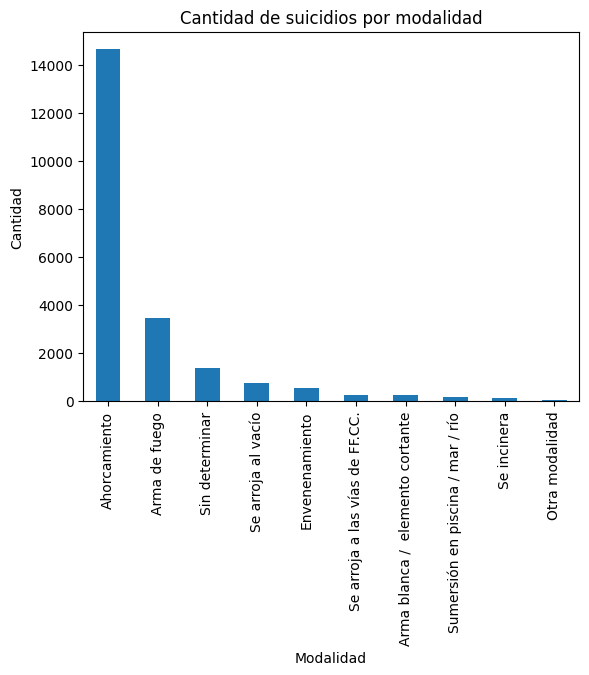

In [ ]:
#Graficamos el total de casos por modalidad
pd_total_por_provincia.groupby('modalidad')['cantidad'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Cantidad de suicidios por modalidad')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad')
plt.show()

In [58]:
#Vemos si hay tendencias anuales en las distintas modalidades

df.groupby(['modalidad','anio'])['anio'].value_counts()



modalidad                         anio
Ahorcamiento                      2017    2198
                                  2018    2731
                                  2019    2518
                                  2020    2325
                                  2021    2405
                                  2022    2474
Arma blanca /  elemento cortante  2017      40
                                  2018      58
                                  2019      46
                                  2020      39
                                  2021      45
                                  2022      37
Arma de fuego                     2017     623
                                  2018     656
                                  2019     624
                                  2020     476
                                  2021     546
                                  2022     529
Envenenamiento                    2017      81
                                  2018     111
                     

Se cuenta la cantidad de suicidios por año diferenciando su modalidad

<Axes: ylabel='provincia'>

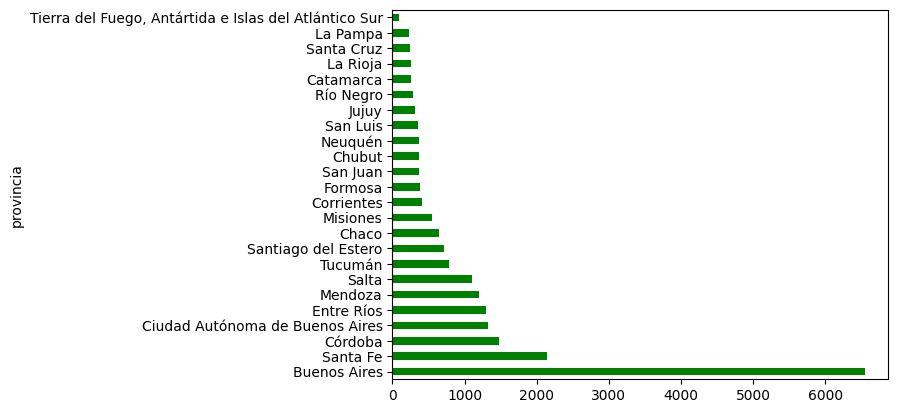

In [ ]:
#Cantidad de suicidios por provincia segun modalidad

pd_total_por_provincia.groupby('provincia')['cantidad'].sum().sort_values(ascending=False).plot(kind='barh', color='green')


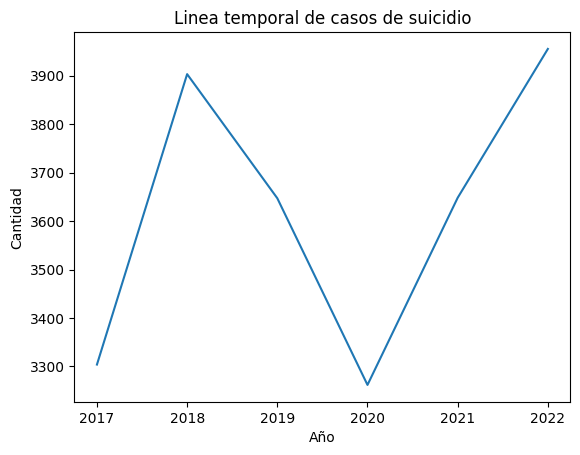

In [ ]:
#Acá podemos usar una gráfico de línea temporal para ver como va evolucionando el número
'''
asesinatos_x_anio = pd.groupby('anio')['Provincia'].unique()
asesinatos_x_anio
'''
su_anio= df.anio.value_counts().sort_index()
su_anio.plot()
plt.title('Linea temporal de casos de suicidio')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()


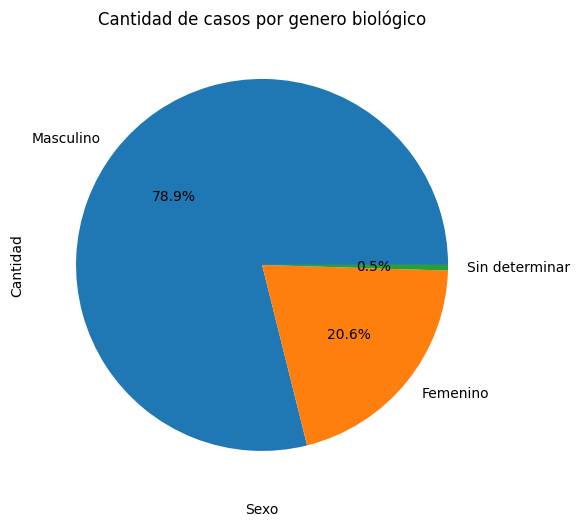

In [47]:
genero= df.sexo.value_counts().sort_values(ascending=False)
genero.plot(kind='pie', figsize=(6, 30),autopct='%1.1f%%')
plt.title('Cantidad de casos por genero biológico')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


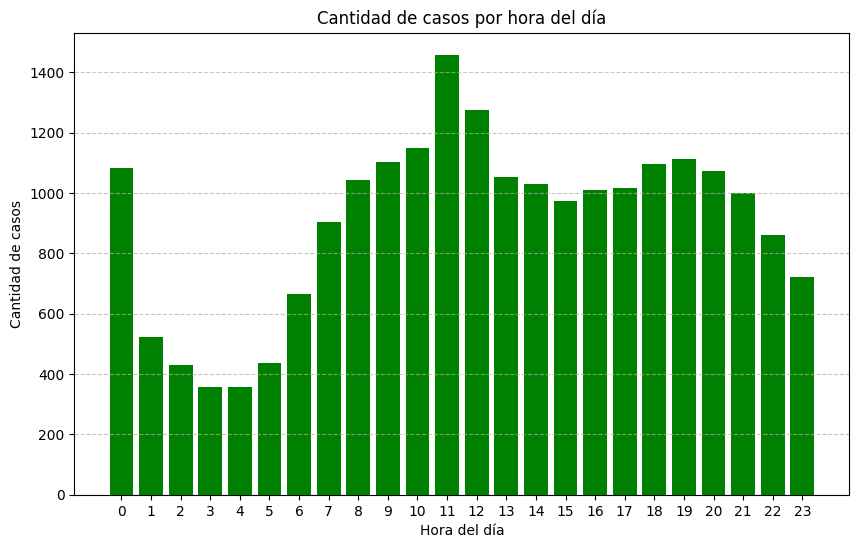

In [ ]:
horas = pd.to_datetime(df['hora_hecho'], format='%H:%M:%S').dt.hour
ocurrencias_por_hora = horas.groupby(horas).size().reset_index(name='cantidad_casos')


plt.figure(figsize=(10, 6))
plt.bar(ocurrencias_por_hora['hora_hecho'], ocurrencias_por_hora['cantidad_casos'], color='green')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de casos')
plt.title('Cantidad de casos por hora del día')
plt.xticks(range(24))  # Asegúrate de tener etiquetas para cada hora del día
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0, 0.5, 'Cantidad')

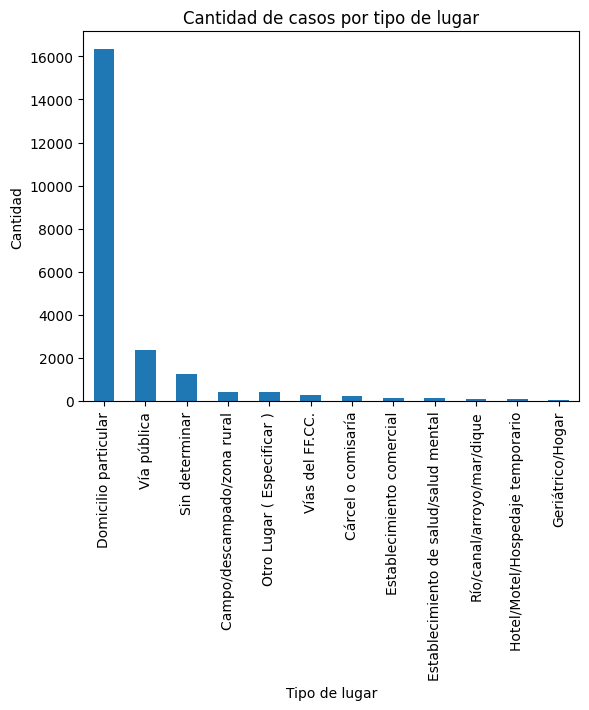

In [ ]:
df.tipo_lugar_ampliado.value_counts().plot(kind='bar')
plt.title('Cantidad de casos por tipo de lugar')
plt.xlabel('Tipo de lugar')
plt.ylabel('Cantidad')


Selección y procesamiento de las columnas a utilizar para el armado y testeo del modelo

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_hecho                21719 non-null  int64 
 1   federal                 21719 non-null  object
 2   provincia_id            21719 non-null  int64 
 3   provincia               21719 non-null  object
 4   departamento_id         21719 non-null  int64 
 5   departamento_nombre     21719 non-null  object
 6   localidad_id            21719 non-null  object
 7   localidad_nombre        21719 non-null  object
 8   anio                    21719 non-null  int64 
 9   mes                     21719 non-null  int64 
 10  fecha_hecho             21719 non-null  object
 11  hora_hecho              21719 non-null  object
 12  tipo_lugar              21719 non-null  object
 13  tipo_lugar_ampliado     21719 non-null  object
 14  modalidad               21719 non-null  object
 15  mo

Como ya notamos anteriormente, hay varias columnas que se repiten en distinto formato; Por ej: provincia_id, provincia y el resto de las columnas que poseen valores geográficos.

En estos casos, dejaremos las columnas que contengan el id.

In [64]:
#Dejamos constancia de cada provincia con su respectivo id, para poder identificarlas luego
df_model

NameError: name 'df_model' is not defined

In [65]:
df_model=df[['provincia_id', 'anio', 'mes','hora_hecho', 'tipo_lugar', 'modalidad','sexo', 'rango_de_edad']]
df_model

,provincia_id,anio,mes,hora_hecho,tipo_lugar,modalidad,sexo,rango_de_edad
0,42,2017,1,13:25:00,Vía pública,Ahorcamiento,Masculino,20-24
1,42,2017,1,01:00:00,Domicilio particular,Arma de fuego,Masculino,55-59
2,78,2017,1,19:00:00,Vía pública,Ahorcamiento,Masculino,15-19
3,58,2017,1,17:30:00,Otro Lugar ( Especificar ),Arma de fuego,Masculino,20-24
4,58,2017,1,22:40:00,Domicilio particular,Ahorcamiento,Masculino,20-24
...,...,...,...,...,...,...,...,...
21714,18,2022,7,07:30:00,Cárcel o comisaría,Ahorcamiento,Masculino,30-34
21715,18,2022,9,05:00:00,Domicilio particular,Sin determinar,Masculino,50-54
21716,18,2022,9,06:45:00,Domicilio particular,Ahorcamiento,Masculino,15-19
21717,18,2022,7,08:45:00,Otro Lugar ( Especificar ),Ahorcamiento,Masculino,30-34
